In [13]:
pip install imbalanced-learn

     |████████████████████████████████| 167 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_eaa41e76a4624863af26995dfc5a57cb.csv"
df=pd.read_csv(url,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [2]:
df.shape

(3196, 37)

In [3]:
df=df.rename(columns={36:"Outcome"})
df.groupby("Outcome")["Outcome"].count()

Outcome
nowin    1527
won      1669
Name: Outcome, dtype: int64

Class distribution is only slight imbalanced.

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [50]:
X=df.drop(["Outcome"],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [51]:
y=df[["Outcome"]]
y.head()

,Outcome
0,1
1,1
2,1
3,1
4,1


In [52]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
20,821.391657
9,539.388389
32,491.747055
7,183.200428
14,150.106364
31,128.357791
17,88.863694
6,88.090365
15,82.134575
34,70.096026


In [53]:
X_scores=scores[scores["scores"]>50]
len(X_scores)

14

In [54]:
X=X.iloc[:,X_scores.index]
X.head()

,20,9,32,7,14,31,17,6,15,34,5,26,28,30
0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,0,0,0,0,1,0,1,1,0,1,0,0,0,0
3,0,0,0,0,1,0,1,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1,0,0,1,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape)
print(X_test.shape)

(2141, 14)
(1055, 14)


In [101]:
from imblearn.ensemble import BalancedRandomForestClassifier
BForest=BalancedRandomForestClassifier(n_estimators=300,criterion="gini",max_depth=13,min_samples_split=3,
                                       min_samples_leaf=1,max_features="auto",bootstrap=False,
                                       sampling_strategy="auto",replacement=True,n_jobs=-1,warm_start=False,
                                       random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
BForest

BalancedRandomForestClassifier(bootstrap=False, max_depth=13,
                               min_samples_split=3, n_estimators=300, n_jobs=-1,
                               random_state=0, replacement=True)

In [102]:
from sklearn.metrics import accuracy_score
train_pred=BForest.predict(X_train)
test_pred=BForest.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.9724427837459131
Accuracy on test data:  0.9649289099526066


In [103]:
from sklearn.metrics import roc_auc_score
print("AUC on train data: ",roc_auc_score(y_train,train_pred))
print("AUC on test data: ",roc_auc_score(y_test,test_pred))

AUC on train data:  0.9728909292391159
AUC on test data:  0.9650847555392126


Confusion matrix for train data: 


<function matplotlib.pyplot.show(close=None, block=None)>

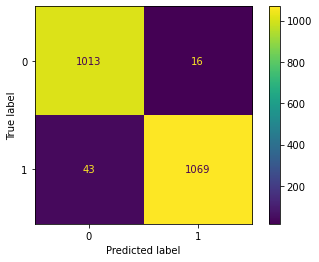

In [104]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("Confusion matrix for train data: ")
plot_confusion_matrix(BForest,X_train,y_train)
plt.show

Confusion matrix for test data: 


<function matplotlib.pyplot.show(close=None, block=None)>

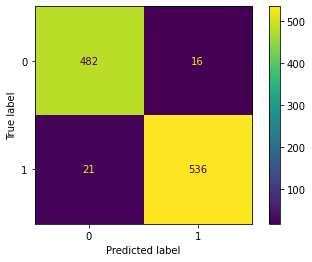

In [105]:
print("Confusion matrix for test data: ")
plot_confusion_matrix(BForest,X_test,y_test)
plt.show

In [107]:
train_pred=pd.DataFrame(train_pred).rename(columns={0:"Predicted train label"})

In [108]:
y_train=y_train.reset_index(drop=True)

In [111]:
compare_train=pd.concat([y_train,train_pred],axis=1)
compare=pd.DataFrame(compare_train["Outcome"]==compare_train["Predicted train label"]).rename(columns={0:"Comparison"})
train_comparison=compare[compare["Comparison"]==False]
train_comparison

,Comparison
10,False
40,False
124,False
136,False
209,False
261,False
281,False
285,False
320,False
359,False


In [112]:
len(train_comparison)

59

In [114]:
train_indices=train_comparison.index.tolist()

In [115]:
X_train=X_train.reset_index(drop=True)
train=pd.concat([X_train,y_train],axis=1)
train1=train.drop(index=train_comparison.index.tolist())
X_train1=train1.drop(["Outcome"],axis=1)
y_train1=train1[["Outcome"]]

In [116]:
test_pred=pd.DataFrame(test_pred).rename(columns={0:"Predicted test label"})

In [117]:
y_test=y_test.reset_index(drop=True)

In [118]:
compare_test=pd.concat([y_test,test_pred],axis=1)
compare=pd.DataFrame(compare_test["Outcome"]==compare_test["Predicted test label"]).rename(columns={0:"Comparison"})
test_comparison=compare[compare["Comparison"]==False]
test_comparison

,Comparison
10,False
12,False
21,False
38,False
102,False
157,False
163,False
192,False
213,False
261,False


In [119]:
len(test_comparison)

37

In [120]:
test_indices=test_comparison.index.tolist()

In [121]:
X_test=X_test.reset_index(drop=True)
test=pd.concat([X_test,y_test],axis=1)
test1=test.drop(index=test_comparison.index.tolist())
X_test1=test1.drop(["Outcome"],axis=1)
y_test1=test1[["Outcome"]]

In [123]:
BForest1=BalancedRandomForestClassifier(n_estimators=300,criterion="gini",max_depth=13,min_samples_split=3,
                                       min_samples_leaf=1,max_features="auto",bootstrap=False,
                                       sampling_strategy="auto",replacement=True,n_jobs=-1,warm_start=False,
                                       random_state=0).fit(X_train1,np.asarray(y_train1).reshape(y_train1.shape[0],))
BForest1

BalancedRandomForestClassifier(bootstrap=False, max_depth=13,
                               min_samples_split=3, n_estimators=300, n_jobs=-1,
                               random_state=0, replacement=True)

In [124]:
train_pred1=BForest1.predict(X_train1)
test_pred1=BForest1.predict(X_test1)
print("Accuracy on train data: ",accuracy_score(y_train1,train_pred1))
print("Accuracy on test data: ",accuracy_score(y_test1,test_pred1))

Accuracy on train data:  1.0
Accuracy on test data:  1.0


In [125]:
print("AUC on 2nd roundtrain data: ",roc_auc_score(y_train1,train_pred1))
print("AUC on 2nd test data: ",roc_auc_score(y_test1,test_pred1))

AUC on 2nd roundtrain data:  1.0
AUC on 2nd test data:  1.0


Confusion matrix for 2nd round train data: 


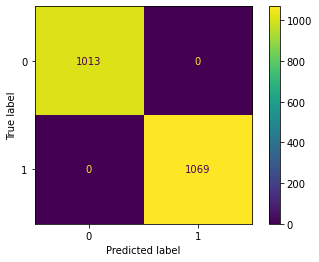

In [126]:
print("Confusion matrix for 2nd round train data: ")
plot_confusion_matrix(BForest1,X_train1,y_train1)
plt.show()

Confusion matrix for 2nd round test data: 


<function matplotlib.pyplot.show(close=None, block=None)>

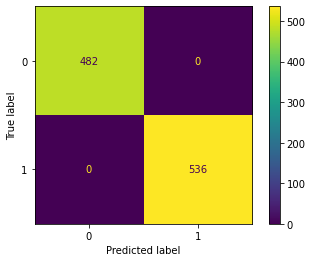

In [127]:
print("Confusion matrix for 2nd round test data: ")
plot_confusion_matrix(BForest1,X_test1,y_test1)
plt.show

The model achieved perfection after the 2nd round.

Let me summarize: <br>
1. Split the data so that 67% is for training and 33% is for testing.<br>
2. Train the model on the train data and test it on the test data. For the initial round, train data accuracy is 97.24%, test data accuracy is 96.49%. <br>
3. Extract the instances that the model missed, from both the train data and the test data. <br>
4. Train the model again on the train data instances that the model missed during the initial round and test it again on the test data instances that the model missed during the inintial round. <br>
5. In the reinforcement round, which is the second round, the model achieved perfection on the instances that it missed during the initial rond. 